### Import all the dependencies

In [120]:
# import all libraries 
import pandas as pd
import numpy as np


import gensim
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
import time
import math

import seaborn as sns

from sklearn.model_selection import cross_validate

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

### Preprocessing: Load all datasets

In [121]:
df_final = pd.read_feather('data/df_final.feather')
df_final.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,Sentiment,Average score
210284,0.13856,0.273585,0.248354,0.540416,-0.085475,0.077318,0.02266,-0.045327,-0.233044,0.028071,...,0.048721,0.08249,-0.18632,0.116215,-0.111338,0.09461,0.011912,-0.135837,0.4125,9.666667


### Discretization for Classification

In [122]:
def discretization(x):
    if x > 6.9: return 1
    else: return 0

df_final["Average score"] = df_final["Average score"].apply(lambda x: discretization(x))

In [123]:
df_final.shape

(210285, 52)

In [124]:
df_final['Average score'].value_counts()

1    209030
0      1255
Name: Average score, dtype: int64

### Random Shuffle 

In [125]:
df_final = df_final.sample(frac = 1)
df_final.shape

(210285, 52)

In [126]:
df_final['Average score'].value_counts()

1    209030
0      1255
Name: Average score, dtype: int64

### Train & Test split

In [127]:
columns = [str(i) for i in range(50)]
X = df_final[columns]
y = df_final['Average score']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)


In [130]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(140890, 50) (69395, 50)
(140890,) (69395,)


### Decision TREE - Unbalanced

In [89]:
train_lst = []
test_lst = []
for i in range(1,21,2):
    print(i)
    model = DecisionTreeClassifier(max_depth = i)
    scores = cross_validate(model, X, y, cv=10,return_train_score=True)
    train_acc = scores['train_score']
    test_acc = scores['test_score']
    train_lst.append(np.mean(train_acc))
    test_lst.append(np.mean(test_acc))


1


KeyboardInterrupt: 

In [ ]:
# plot the graph
x = np.array([i for i in range(1,21,2)])
train = np.array(train_lst)
test = np.array(test_lst)
plt.plot(x,train,'g--', label = 'train_acc')
plt.plot(x, test, 'o--', label = 'test_acc')
plt.xlabel("max_depth for DT")
plt.ylabel("accuracy")
plt.legend()

plt.savefig('plots/Decision_Tree_For_Unbalanced_Dataset.png')

plt.show()

### Decision Tree - Balanced

In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.4, random_state=32)
X_smo, y_smo = smote.fit_sample(X, y)

In [132]:
X_smo["Review"] = y_smo

In [133]:
df_balanced = X_smo

In [134]:
df_balanced['Review'].value_counts()

1    209030
0     83612
Name: Review, dtype: int64

In [135]:
df_balanced = df_balanced.sample(frac = 1)

In [136]:
columns = [str(i) for i in range(50)]
X = df_balanced[columns]
y = df_balanced['Review']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)



In [138]:
train_mean = []
train_std = []


test_mean = []
test_std = []


for i in range(1,100,10):
    print(i)
    model = DecisionTreeClassifier(max_depth = i)
    scores = cross_validate(model, X, y, cv=10,return_train_score=True)
    train_acc = scores['train_score']
    test_acc = scores['test_score']
    train_mean.append(np.mean(train_acc))
    train_std.append(math.sqrt(np.var(train_acc)))
    test_mean.append(np.mean(test_acc))
    test_std.append(math.sqrt(np.var(test_acc)))
    



1
11
21
31
41
51
61
71
81
91


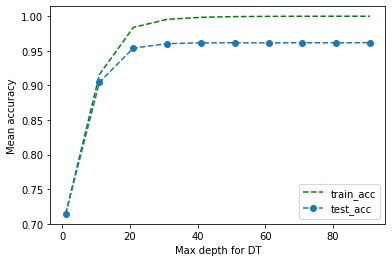

In [139]:
# plot the graph
x = np.array([i for i in range(1,100,10)])
train = np.array(train_mean)
test = np.array(test_mean)
plt.plot(x,train,'g--', label = 'train_acc')
plt.plot(x, test, 'o--', label = 'test_acc')
plt.xlabel("Max depth for DT")
plt.ylabel("Mean accuracy")
plt.legend()

plt.savefig('plots/Decision_Tree_Mean_Acc.png')

plt.show()

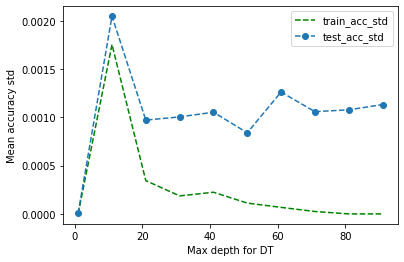

In [140]:
# plot the graph
x = np.array([i for i in range(1,100,10)])
train = np.array(train_std)
test = np.array(test_std)
plt.plot(x,train,'g--', label = 'train_acc_std')
plt.plot(x, test, 'o--', label = 'test_acc_std')
plt.xlabel("Max depth for DT")
plt.ylabel("Mean accuracy std")
plt.legend()

plt.savefig('plots/Decision_Tree_Mean_Acc_std.png')

plt.show()

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [142]:
X.shape

(292642, 50)

In [143]:
dt = DecisionTreeClassifier(max_depth = 20).fit(X_train,y_train)
dt.score(X_train,y_train),dt.score(X_test,y_test)

(0.9796501249553731, 0.9472517914095183)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27549
           1       0.98      0.94      0.96     69023

    accuracy                           0.95     96572
   macro avg       0.93      0.95      0.94     96572
weighted avg       0.95      0.95      0.95     96572



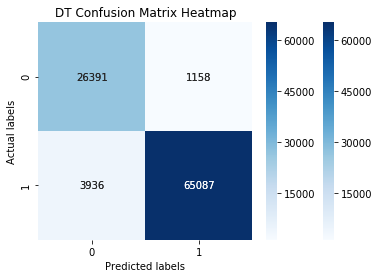

In [145]:
dt_pre = dt.predict(X_test)
print(classification_report(y_test,dt_pre))
matrix_dt = confusion_matrix(y_test,dt_pre)
sns.heatmap(matrix_dt, annot = True, fmt='d',xticklabels=['0','1'],yticklabels=['0','1'],cmap='Blues')

ax = sns.heatmap(matrix_dt, annot = True, fmt='d',xticklabels=['0','1'],yticklabels=['0','1'],cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('DT Confusion Matrix Heatmap')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.savefig('plots/Decision_Tree_Confusion_Matrix.png')


plt.show()